<a href="https://colab.research.google.com/github/Rominaarab/Machine-learning/blob/main/pharma_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **👩🏻‍💻 Pharma Sales Analysis Notebook**



# **Introduction**
This analysis investigates the sales performance of a pharmaceutical company spanning the years 2017-2020. The primary objective is to guide strategic investment decisions regarding which medications and target markets should receive prioritized funding and resources in the coming year.

The pharmaceutical company seeks to optimize its research and manufacturing capabilities by identifying emerging disease prevalence patterns, determining appropriate production quantities, and allocating investment capital efficiently. By analyzing historical sales data across different medications and geographical regions, this study aims to provide data-driven recommendations that will enhance the company's market position while addressing critical healthcare needs.

I, as a data scientist, Through comprehensive analysis of sales trends, geographical distribution, and disease patterns, will help the company make informed decisions about resource allocation, production planning, and investment strategy for the upcoming fiscal year.

This dataset comprises detailed sales transactions from Gottlieb-Cruickshank's operations in Poland during January 2018. It contains comprehensive information covering customer details, product specifics, and sales team data within the pharmaceutical sector.

Reference : https://www.kaggle.com/datasets/akanksha995579/pharma-data-analysis


I checked the data in Excel format and converted it to CSV format for further processing.

Dataset Description Columns:

Distributor: The name of the distributing company, which is consistent across all records as "Gottlieb-Cruickshank."

Customer Name: The name of the customer or the purchasing entity.

City: The city in Poland where the customer is located.

Country: The country of the transaction, consistently listed as "Poland."

Latitude: The latitude coordinate of the customer's city.

Longitude: The longitude coordinate of the customer's city.

Channel: The distribution channel, either "Hospital" or "Pharmacy."

Sub-channel: Specifies whether the sub-channel is "Private," "Retail," or "Institution."

Product Name: The name of the pharmaceutical product sold.

Product Class: The classification of the product, such as "Mood Stabilizers," "Antibiotics," or "Analgesics."

Quantity: The number of units sold.

Price: The price per unit of the product.

Sales: The total sales amount, calculated as Quantity * Price.

Month: The month of the transaction, which is "January" for all records.

Year: The year of the transaction, which is "2018" for all records.

Name of Sales Rep: The name of the sales representative handling the transaction.

Manager: The manager overseeing the sales representative.

Sales Team: The sales team to which the sales representative belongs, such as "Delta," "Bravo," or "Alfa."

# **Import Libraries**

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Matplotlib is building the font cache; this may take a moment.


In [ ]:
warnings.filterwarnings('ignore')

# **Load and Exploring the dataset**

In [ ]:
df = pd.read_csv("Pharma_data.csv")

In [ ]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

The data consist of 17 total features mostly demographic. Both categorical and numerical are among our datatypes.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,254082.0,50.962222,1.625526,4.751420e+01,49.8056,51.1333,52.0833,5.478190e+01
Longitude,254082.0,10.803212,4.143311,6.083800e+00,7.8911,9.3978,12.1333,2.356670e+01
Quantity,254082.0,112.872139,744.310385,-7.200000e+03,5.0000,20.0000,50.0000,1.176000e+05
Price,254082.0,412.207720,224.963687,2.200000e+01,195.0000,430.0000,605.0000,7.940000e+02
Sales,254082.0,46437.715549,349191.838308,-4.161600e+06,1704.0000,5850.0000,21565.2500,7.420560e+07
Year,254082.0,2018.385187,1.041352,2.017000e+03,2018.0000,2018.0000,2019.0000,2.020000e+03


In this line we can see that the actual amounts often differ quite a bit from that average amount and the year values are tightly clustered around 2019.

In [ ]:
df.isnull().sum()

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64

We don't have any null-value in our target columns. Otherwise I should remove Null Values in columns: df.dropna(), or by using "Imputer" fill missing values with the mean or median or mode of that column.

In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

As 'Quantity' and 'Sales' are objects, I convert them to int64".

<Figure size 1000x1000 with 0 Axes>

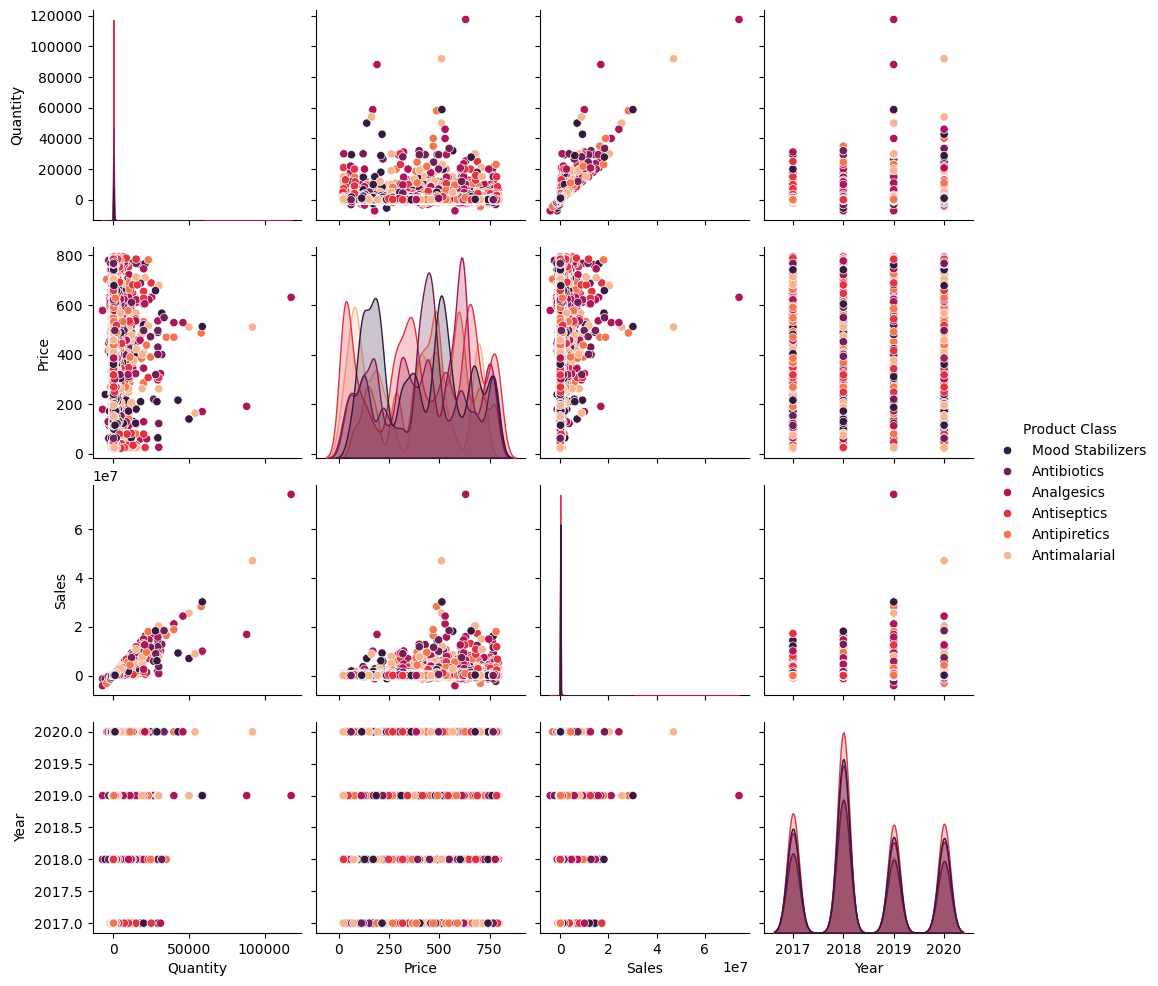

In [ ]:
# Create a new columns for 'columns_to_plot'
columns_to_plot = ['City', 'Country', 'Channel', 'Product Name', 'Product Class', 'Quantity', 'Price', 'Sales', 'Year']

# Set up the plot
plt.figure(figsize=(10, 10))
sns.pairplot(df[columns_to_plot], hue='Product Class', palette='rocket')

# Show the plot
plt.show()

This scatterplot matrix provides insights into the relationships between quantity, price, sales, and year for six pharmaceutical product classes (Mood Stabilizers, Antibiotics, Analgesics, Antiseptics, Antipiretics, and Antimalarial). It highlights significant clusters and trends:

Product Distribution: A diverse range of products, including Mood Stabilizers, Antibiotics, and Analgesics, shows varying sales performances and pricing strategies.

Price vs. Sales Correlation: Higher prices do not always correlate with increased sales, suggesting potential price sensitivity within certain product categories.

Temporal Sales Patterns: Notable peaks in sales during specific years indicate seasonal or market-driven demand fluctuations, warranting closer analysis for strategic planning.

Some products reach quantities over 100,000 units and prices up to $800, with sales peaks around 2018-2019. The density plots indicate varying distribution patterns across different variables.

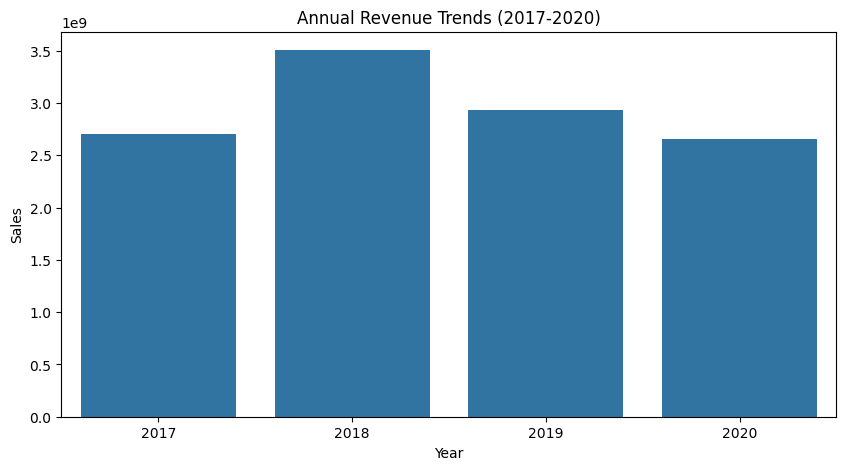

In [ ]:
# Create a new column for 'Sale_per_year'
Sale_per_year = df.groupby('Year')['Sales'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(10, 5))
plt.title('Annual Revenue Trends (2017-2020)')
sns.barplot(data = Sale_per_year, x = 'Year', y = 'Sales')

# Show the plot
plt.show()

The graph shows revenue peaked in 2018 at approximately 3.5 euro, followed by a decline in subsequent years, with 2020 showing the lowest revenue at around 2.6 billion euro, potentially indicating a downward trend or impact from external factors.

In [ ]:
#A dictionary named city_sales
city_sales = {}

#Make a loop through the DataFrame
for i in range(len(df)):
    city = df.loc[i, "City"]
    sales = df.loc[i, "Sales"]

    #Extracting Values
    if city in city_sales:
        city_sales[city] += sales  # Add sales to existing city
    else:
        city_sales[city] = sales
#Creating a DataFrame and sort it
top_cities = pd.DataFrame(list(city_sales.items()), columns=["City", "Sales"])
top_cities = top_cities.sort_values(by="Sales", ascending=False).head(10)

In [ ]:
print(top_cities)

               City         Sales
529        Butzbach  9.356178e+07
270      Baesweiler  6.489050e+07
310        Cuxhaven  5.600668e+07
276       Friedberg  5.218363e+07
507       Altenburg  5.088532e+07
530       Emsdetten  4.593901e+07
297         Bottrop  4.445462e+07
688        Freising  4.377938e+07
608           Trier  4.349563e+07
604  Castrop-Rauxel  4.206666e+07


This table shows sales data for 10 German cities, with Butzbach having the highest sales (over 93 million) and Castrop-Rauxel the lowest (about 41.5 million) among those listed. The first column appears to be a store ID or reference number rather than a ranking.

In [ ]:
product_sales = df.groupby(['Product Name', 'Year'])['Sales'].sum().reset_index()
top_product = product_sales.loc[product_sales['Sales'].idxmax()]

print(f"\nTop Product: {top_product['Product Name']} in Year: {top_product['Year']} with Sales: {top_product['Sales']}")


Top Product: Ionclotide in Year: 2019 with Sales: 90205867.0


product 133: Ionclotide Disease related to Ionclotide (Irritable Bowel Syndrome with Constipation (IBS-C) and Chronic Idiopathic Constipation (CIC) may be on the rise based on high sales. The data indicates evolving medication trends are extending and suggesting potential for strategic product portfolio diversification. These findings underscore the importance of maintaining a balanced approach to research and development even during periods dominated by a single health crisis.

referenced by: PATIENT.INFO, DRUGS.COM

In [ ]:
location_sales=df.groupby(['Country'])['Sales'].sum().reset_index()
top_location=location_sales.loc[location_sales['Sales'].idxmax()]

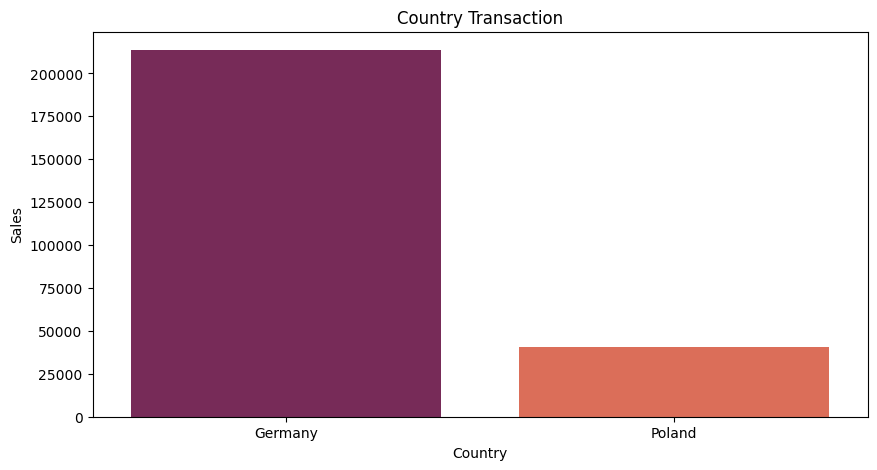


Top Location: Germany with Sales: 11118107840.395416


In [ ]:
plt.figure(dpi=100, figsize=(10, 5))

sns.countplot(x='Country', data=df, palette='rocket', order=df['Country'].value_counts().index)

plt.xlabel('Country')
plt.ylabel('Sales')  # Corrected typo here
plt.title('Country Transaction')

plt.show()
print(f"\nTop Location: {top_location['Country']} with Sales: {top_location['Sales']}")

Through Geramny, the company had the most sale with the amount of 11115143057 euro.

In [ ]:
team_sales = df.groupby('Sales Team')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
best_team = team_sales.iloc[0]

([<matplotlib.patches.Wedge at 0xc49db38>,
 [Text(0.6236934906308578, 0.9060940512687943, 'Delta'),
  Text(-0.9887971402227045, 0.48195457824093924, 'Charlie'),
  Text(-0.5635539363861372, -0.9446729385261812, 'Bravo'),
  Text(0.8503215742559697, -0.6978203352975962, 'Alfa')],
 [Text(0.34019644943501326, 0.4942331188738877, '30.8%'),
  Text(-0.5393438946669297, 0.26288431540414864, '23.9%'),
  Text(-0.30739305621062024, -0.5152761482870079, '23.4%'),
  Text(0.4638117677759834, -0.3806292737986888, '21.9%')])

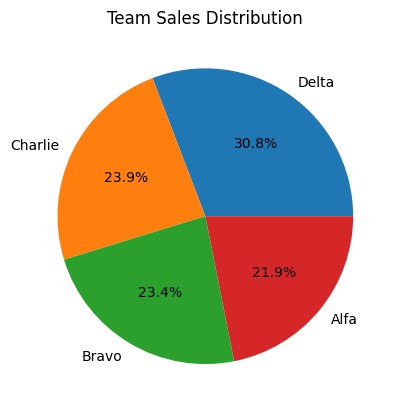

In [ ]:
fig,ax = plt.subplots()
plt.title('Team Sales Distribution')
ax.pie(team_sales['Sales'], labels = team_sales['Sales Team'], autopct='%1.1f%%')

The pie chart illustrates the distribution of sales among four teams, with Delta leading at 30.8%. Charlie, Bravo, and Alfa have closely matched shares, ranging from 21.9% to 23.9%, indicating a competitive performance among them.

In [ ]:
ionclotide_2019 = df[(df['Product Name'] == 'Ionclotide') & (df['Year'] == 2019)]

total_quantity = ionclotide_2019['Quantity'].sum()
total_price = ionclotide_2019['Price'].sum()

([0, 1], [Text(0, 0, 'Total Quantity'), Text(1, 0, 'Total Price')])

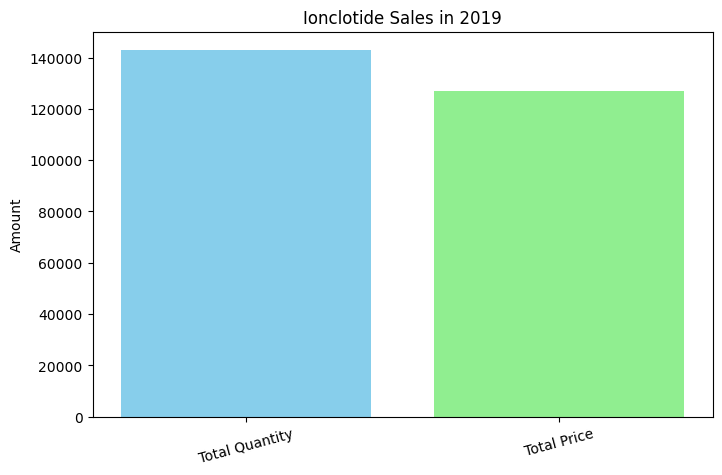

In [ ]:
categories = ['Total Quantity', 'Total Price']
values = [total_quantity, total_price]
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['skyblue', 'lightgreen'])
plt.title('Ionclotide Sales in 2019')
plt.ylabel('Amount')
plt.xticks(rotation=15)

Total quantity of Ionclotide in 2019: 142957.0

Total price of Ionclotide in 2019: 126831.

So the company with the price of Ionclotide about 127000 euro/ unit , had a return of 90200000 in 2019.

In [ ]:
price_trend = df.groupby('Year')['Price'].mean()

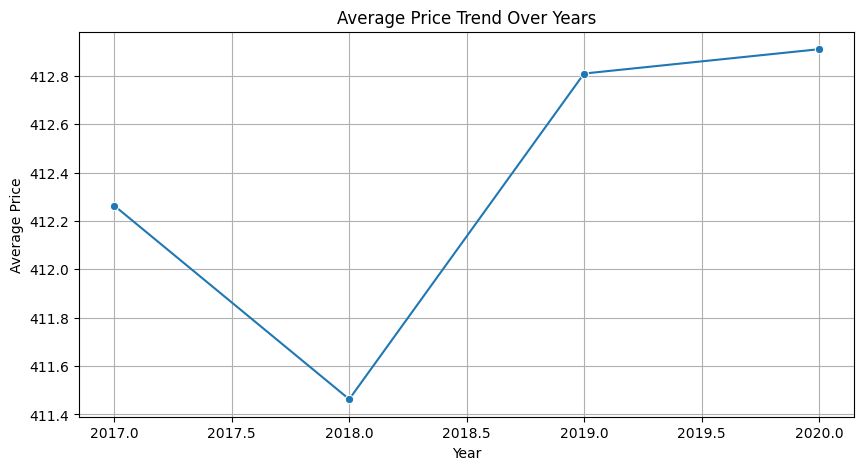

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=price_trend.index, y=price_trend.values, marker='o')

plt.title('Average Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True) # I added grid for better readability

plt.show()

The line chart depicts a fluctuating trend in average prices from 2017 to 2020, highlighting a notable drop in 2018, followed by a significant recovery in 2019. This suggests potential market volatility or shifts in supply and demand dynamics during this period.

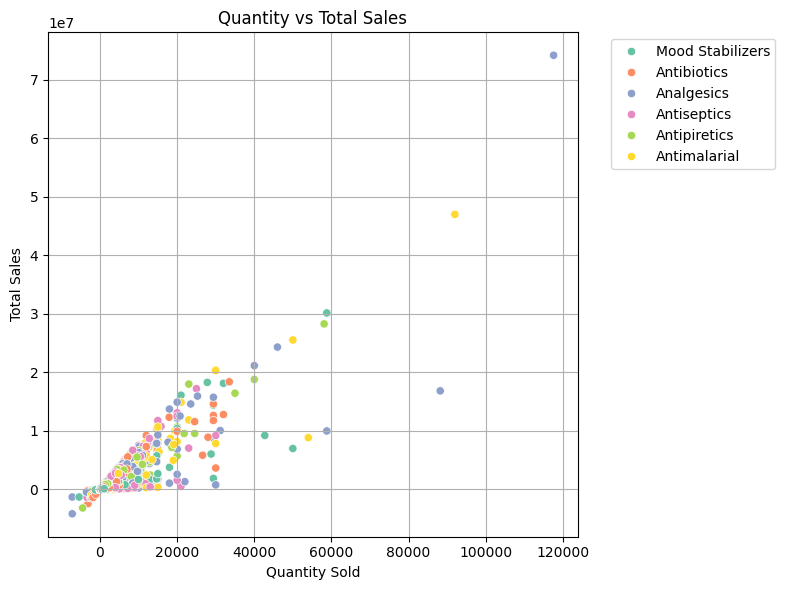

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Quantity', y='Sales', data=df, hue='Product Class', palette='Set2')

plt.title('Quantity vs Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)

plt.show()

The scatter plot illustrates a positive correlation between quantity sold and total sales, indicating that higher sales are generally associated with increased quantities. However, notable outliers suggest that some products achieve high sales with relatively lower quantities, potentially indicating higher pricing or market demand for those specific items.

In [ ]:
channel_sales = df.groupby(['Channel', 'Country'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
best_channel = team_sales.iloc[0]

best_team=channel_sales.loc[channel_sales.groupby('Country')['Sales'].idxmax()]
best_teams = best_team.sort_values(by='Sales')

print(best_teams)

    Channel  Country         Sales
1  Hospital   Poland  3.444601e+08
2  Pharmacy  Germany  5.881892e+09


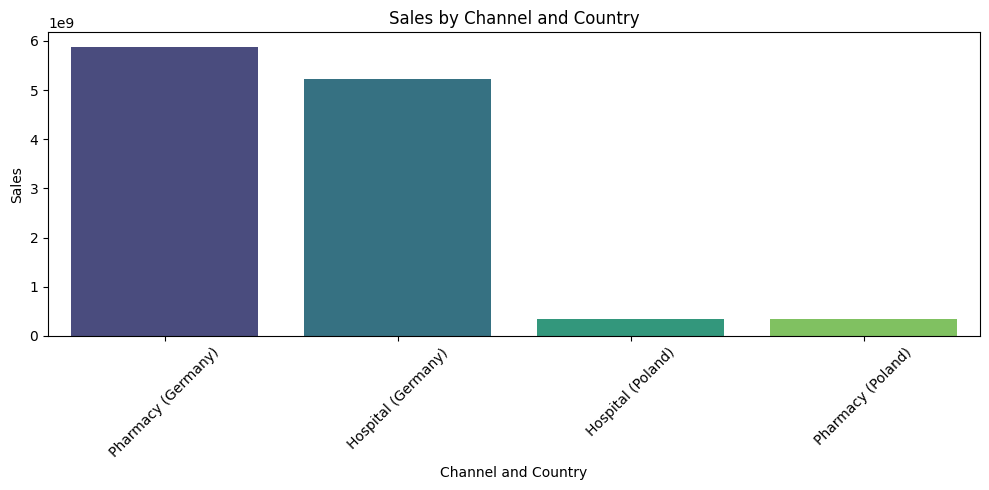

In [ ]:
channel_sales = df.groupby(['Channel', 'Country'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Create a new column for 'Channel and Country'
channel_sales['Channel and Country'] = channel_sales['Channel'] + ' (' + channel_sales['Country'] + ')'

# Set up the plot
plt.figure(figsize=(10, 5))
plt.title('Sales by Channel and Country')
sns.barplot(data=channel_sales, x='Channel and Country', y='Sales', palette='viridis')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()